# Statistical Machine Learning 2020
# Assignment 1
# Deadline: 7 October 2020

## Instructions
* You can __work in groups__ (= max 3 people). __Write the full name and S/U-number of all team members in the header above.__
* Make sure you __fill in any place that says__ `YOUR CODE HERE` or "YOUR ANSWER HERE" __including comments, derivations, explanations, graphs, etc.__ This means that the elements and/or intermediate steps required to derive the answer have to be in the report. (Answers like 'No' or 'x=27.2' by themselves are not sufficient, even when they are the result of running your code.) If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends (if applicable).
* Please do not add new cells, __write the answers only in the provided cells__. Before you turn this problem in, make sure everything runs as expected. First, *restart the kernel* (in the menubar, select Kernel$\rightarrow$Restart) and then *run all cells* (in the menubar, select Cell$\rightarrow$Run All). The assignment was written in (and we strongly recommend using) Python 3 by using the corresponding Python 3 kernel for Jupyter.
* The assignment includes certain cells that contain tests. Most of the tests are marked as *hidden* and are used for automatic grading. NB: These hidden tests do not provide any feedback! There are also a couple of tests / checks that are visible, which are meant to help you avoid basic coding errors.
* __Upload reports to Brightspace as a single .ipynb file containing the submitter's S/U-number: 'SML20_as01_&lt;submitter-S/U-number&gt;.ipynb'__, e.g., 'SML20_as01_S123456.ipynb'. For those working in groups, it is sufficient if one team member uploads the solutions.
* For any problems or questions, send us an email, or just ask. Email addresses: G.Bucur@cs.ru.nl, Yuliya.Shapovalova@ru.nl, and tomc@cs.ru.nl .

## Introduction
Assignment 1 consists of 3 exercises:
1. Polynomial curve fitting (50 points),
2. Gradient descent algorithm (25 points),
3. Probability theory (25 points).
The assignment also includes an optional exercise (worth 10 bonus points).

## Libraries
First, we import the basic libraries necessary to develop this assignment. Of course you are free to import further libraries, if required, in the allotted cells.

In [54]:
# Necessary imports (for solutions)
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

# Set fixed random seed for reproducibility
np.random.seed(2020)

## Exercise 1 (weight 50)
Consider once more the $M$-th order polynomial 
\begin{equation*}
y(x;\mathbf{w}) = w_0 + w_1 x + \ldots + w_M x^M  = \sum_{j=0}^M w_j x^j 
\label{yxw} \tag{1}
\end{equation*}

### Exercise 1.1
Create the function $f(x) = 1 + \sin(6(x - 2))$. Generate a data set $\mathcal{D}_{10}$ of 10 noisy observations of this function. Take the 10 inputs spaced uniformly in range $[0,1]$, and assume that the noise is Gaussian with mean 0 and standard deviation 0.3. $\mathcal{D}_{10}$ will be the training set. In a similar way, generate an additional test set $\mathcal{T}$ of 100 noisy observations over the same interval. Plot both the function and observations in $\mathcal{D}_{10}$ in a single graph (similar to Bishop, Fig.1.2).

In [55]:
def f(x):
    """
    This function computes (x)=1+sin(6(x−2))
    
    Parameters
    ----------
    x : float
        Input number.
    
    Returns
    -------
    float
        Result of the function.
    """
    ### BEGIN SOLUTION
    return 1 + np.sin(6 * (x - 2))
    ### END SOLUTION

In [56]:
"""
Basic check that function f is correct.
"""
assert f(2) == 1

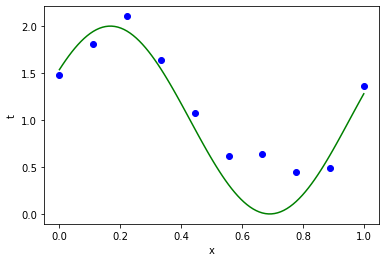

In [69]:
"""
Generate a data set of N_train noisy observations of the function f. Take the inputs spaced uniformly
in range [0,1], and add Gaussian noise with mean 0 and standard deviation 0.3.

Variable names
--------------
N_train : int
    number of training observations
X_train : array
    N_train x 1 vector of x-coordinates, uniformly spaced between 0 and 1
t_train : array
    N_train x 1 vector with corresponding t-values, adding Gaussian noise
D_train : matrix
    N_train x 2 matrix, the training data created from X_train and t_train

N_test : int
    number of data points for testing
X_test : array
    N_test x 1 vector of random x-coordinates taken form a uniform distribution
t_test : array
    N_test x 1 vector with corresponding t-values, adding Gaussian noise
D_test : matrix
    N_test x 2 matrix, the test data created from X_test and t_test
"""
### BEGIN SOLUTION
# standard deviation of noise
eps = 0.3

N_train = 10 # number of training observations
# generate Nx1 vector of random x-coordinates, uniformly distributed on [0, 1]
X_train = np.linspace(0, 1, N_train)
# generate Nx1 vector with corresponding t-values, adding Gaussian noise
t_train = f(X_train) + eps * np.random.normal(size = N_train)
# Combine them into a Nx2 matrix, the training data
X_train.shape = (N_train, 1)
t_train.shape = (N_train, 1)
D_train = np.concatenate((X_train, t_train), axis = 1)

# Set number of data points for testing
N_test = 100
# Generate N_test new random x-coordinates on [0, 1]
X_test = np.random.uniform(size = N_test)
# Generate corresponding t-values, adding Gaussian noise
t_test = f(X_test) + eps * np.random.normal(size = N_test)
# Combine them into an Ntest x 2 matrix, the test data
X_test.shape = (N_test, 1)
t_test.shape = (N_test, 1)
D_test = np.concatenate((X_test, t_test), axis = 1)

# plot true function (in green) and observations (as blue dots)
X_grid = np.linspace(0, 1, 100)
plt.plot(X_train, t_train, 'bo', X_grid, f(X_grid), 'g-')
plt.xlabel('x')
plt.ylabel('t')
plt.show()
    
### END SOLUTION

In [71]:
"""
Hidden test for variables N_train, X_train, t_train.
"""
### BEGIN HIDDEN TESTS
assert N_train == 10

test_X_train = np.linspace(0, 1, N_train)
# X_train can be given as either (N_train, 1) matrix or (N_train, ) vector
test_X_train.shape = X_train.shape 

assert np.array_equal(X_train, test_X_train)
### END HIDDEN TESTS

### Exercise 1.2
Create a function `polynomial_curve_fit(D,M)` that takes as input a data set $\mathcal{D}_{N}$, consisting of $N$ input/output-pairs $\{x_n,t_n\}$, and a parameter $M$, representing the order of the polynomial in \eqref{yxw}, and outputs a vector of weights $\mathbf{w} = [w_0, \dots, w_M]$ that minimizes the sum-of-squares error function
\begin{equation*} E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N \{ y(x_{n} ; \mathbf{w}) - t_{n} \} ^2 \tag{2} \end{equation*}
Hint: use the results from the Tutorial Exercises (Week 1, Exercise 5), and `np.linalg.solve` to solve a linear system of equations.

In [74]:
def polynomial_curve_fit(D, M):
    ''' This functions computes the value of a polynomial with weights w on data points x.
    
    Parameters
    ----------
    D : array
        Input dataset D.
    M : int
        The degree of the polynomial.
    
    Returns
    -------
    float
        Fitted weight vector w that minimizes the sum-of-squares function.
    '''
    ### BEGIN SOLUTION
    # Generate A matrix
    A = np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i, j] = sum(D[:, 0]**(i+j))
    
    # Generate T vector
    T = np.zeros(M+1)
    for i in range(M+1):
        T[i] = sum(D[:, 1] * (D[:, 0]**i))
        
    # Solve T = A * w for w
    w = np.linalg.solve(A, T)
    
    return w
    ### END SOLUTION

In [79]:
"""
Hidden test for polynomial_curve_fit.
"""
### BEGIN HIDDEN TESTS

hidden_D =     np.array([[0.,1.00591921],[0.11111111,1.96616531],[0.22222222,1.60720685],[0.33333333,1.34859206],
              [0.44444444,0.64074808],[0.55555556,-0.06978151],[0.66666667,-0.00770458],
              [0.77777778,0.15185728],[0.88888889,0.74888265],[1.,1.10755075]])
hidden_w = polynomial_curve_fit(hidden_D, 3)
assert np.allclose(hidden_w, [1.24158496, 5.7439602, -23.00627062, 17.39223888])

### END HIDDEN TESTS

[  1.24158496   5.7439602  -23.00627062  17.39223888]


### Exercise 1.3
For the given dataset $\mathcal{D}_{10}$, run the `polynomial_curve_fit(D,M)` function for $M = [0, \dots, 9]$,  and, 
* Plot for various orders $M$ (at least for $M=0, M=1, M=3, M=9$) the resulting polynomial, together with the function $f$ and observations $\mathcal{D}_{10}$ (similar to Bishop, Fig 1.4)
* For each order $M \in [0, \dots, 9]$,  compute the root-mean-square error
\begin{equation*} E_{\text{RMS}} = \sqrt{2 E(\mathbf{w^*})/N} \tag{3} \end{equation*}
of the corresponding polynomial, evaluated on both the training set $\mathcal{D}_{10}$ and the testset $\mathcal{T}$.  Plot both as a function of $M$ in a single graph. (see Bishop, Fig.1.5).

First define the `polynomial` function to help you with calculating the predictions of outputs for the training and test data given w.

In [80]:
def polynomial(x, w):
    ''' This functions computes the value of a polynomial with weights w on data points x.
    
    Parameters
    ----------
    x : float
        Set of x-coordinates for which to evaluate the polynomial.
    w : float
        Input weight vector of size M+1 (for polynomial of degree M).
    
    Returns
    -------
    float
        Values of polynomial with weights w evaluated at x.
    '''
    ### BEGIN SOLUTION
    y = np.zeros(x.shape)
    
    for j in range(len(w)):
        y += (x**j) * w[j]
    
    return y
    ### END SOLUTION

In [81]:
"""
Test for polynomial.
"""
assert np.array_equal(polynomial(np.array([1, 2]), np.array([1, 2, 3])),np.array([ 6., 17.]))

Now with the help of `polynomial` calculate the predictions. Then calculate the root-mean-square-error and 
create plots for various orders of $M$.

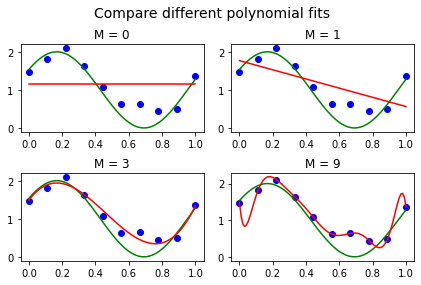

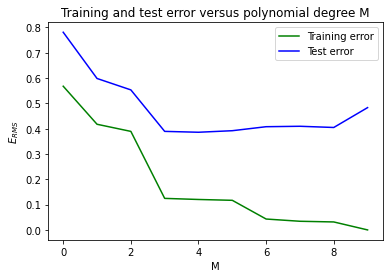

In [82]:
### BEGIN SOLUTION
# Calculate training error and test error for different values of M
FitEvaluation = namedtuple('FitEvaluation', ['w', 'y_train', 'y_test', 'rmse_train', 'rmse_test'])
fits = []
M_max = 10

for i in range(M_max):
    
    # Calculate ML value for model parameters w
    w = polynomial_curve_fit(D_train, i)
    
    # Calculate predictions of outputs for training data given w
    y_train = polynomial(X_train, w)
    # Calculate predictions of ouptuts for test data given w
    y_test = polynomial(X_test, w)
    
    # Calculate root-mean-square training error
    rmse_train = math.sqrt(sum((y_train - t_train)**2) / N_train)
    # Calculate root-meqn-square test error
    rmse_test = math.sqrt(sum((y_test - t_test)**2) / N_test)
    
    fits.append(FitEvaluation(w, y_train, y_test, rmse_train, rmse_test))
    # fits.append((w = fitsw, y_train, y_test, rmse_train, rmse_test))

# We are going to plot fitted polynomials of different degrees in the same graph
degrees = [0, 1, 3, 9]

for i in range(len(degrees)):
    plt.subplot(2, 2, i+1)
    plt.plot(X_train, t_train, 'bo', 
             X_grid, f(X_grid), 'g-',
             X_grid, polynomial(X_grid, fits[degrees[i]].w), 'r-')
    plt.title("M = " + str(degrees[i]))
    plt.tight_layout()
plt.suptitle("Compare different polynomial fits", fontsize = 14)
plt.subplots_adjust(top = 0.85)
plt.show()


# Plot training and test error versus polynomial degree M
plt.figure()
plt.plot(range(M_max), [f.rmse_train for f in fits], 'g-',
     range(M_max), [f.rmse_test for f in fits], 'b-')
plt.title("Training and test error versus polynomial degree M")
plt.xlabel("M")
plt.ylabel("$E_{RMS}$")
plt.legend(['Training error', 'Test error'])
plt.show()
### END SOLUTION

### Exercise 1.4
Repeat this procedure for a data set $\mathcal{D}_{40}$ of  40 observations (with the same noise level) and compare with the previous result.

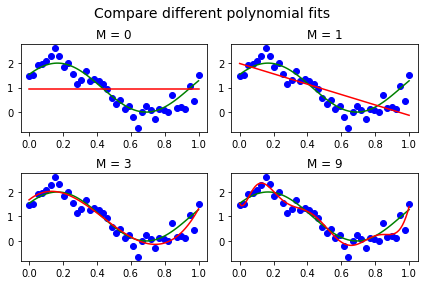

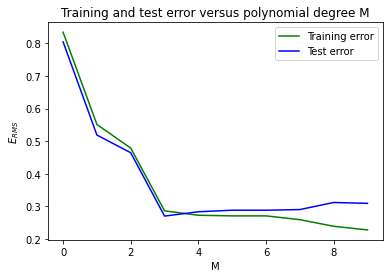

In [11]:
### BEGIN SOLUTION
N_train = 40 # number of training observations
# generate Nx1 vector of random x-coordinates, uniformly distributed on [0, 1]
X_train = np.linspace(0, 1, N_train)
# generate Nx1 vector with corresponding t-values, adding Gaussian noise
t_train = f(X_train) + eps * np.random.normal(size = N_train)
# Combine them into a Nx2 matrix, the training data
X_train.shape = (N_train, 1)
t_train.shape = (N_train, 1)
D_train = np.concatenate((X_train, t_train), axis = 1)

# Set number of data points for testing
N_test = 100
# Generate N_test new random x-coordinates on [0, 1]
X_test = np.random.uniform(size = N_test)
# Generate corresponding t-values, adding Gaussian noise
t_test = f(X_test) + eps * np.random.normal(size = N_test)
# Combine them into an Ntest x 2 matrix, the test data
X_test.shape = (N_test, 1)
t_test.shape = (N_test, 1)
D_test = np.concatenate((X_test, t_test), axis = 1)

# Calculate training error and test error for different values of M
FitEvaluation = namedtuple('FitEvaluation', ['w', 'y_train', 'y_test', 'rmse_train', 'rmse_test'])
fits = []
M_max = 10

for i in range(M_max):
    
    # Calculate ML value for model parameters w
    w = polynomial_curve_fit(D_train, i)
    
    # Calculate predictions of outputs for training data given w
    y_train = polynomial(X_train, w)
    # Calculate predictions of ouptuts for test data given w
    y_test = polynomial(X_test, w)
    
    # Calculate root-mean-square training error
    rmse_train = math.sqrt(sum((y_train - t_train)**2) / N_train)
    # Calculate root-meqn-square test error
    rmse_test = math.sqrt(sum((y_test - t_test)**2) / N_test)
    
    fits.append(FitEvaluation(w, y_train, y_test, rmse_train, rmse_test))
    # fits.append((w = fitsw, y_train, y_test, rmse_train, rmse_test))

# We are going to plot fitted polynomials of different degrees in the same graph
degrees = [0, 1, 3, 9]

for i in range(len(degrees)):
    plt.subplot(2, 2, i+1)
    plt.plot(X_train, t_train, 'bo', 
             X_grid, f(X_grid), 'g-',
             X_grid, polynomial(X_grid, fits[degrees[i]].w), 'r-')
    plt.title("M = " + str(degrees[i]))
    plt.tight_layout()
plt.suptitle("Compare different polynomial fits", fontsize = 14)
plt.subplots_adjust(top = 0.85)
plt.show()


# Plot training and test error versus polynomial degree M
plt.figure()
plt.plot(range(M_max), [f.rmse_train for f in fits], 'g-',
     range(M_max), [f.rmse_test for f in fits], 'b-')
plt.title("Training and test error versus polynomial degree M")
plt.xlabel("M")
plt.ylabel("$E_{RMS}$")
plt.legend(['Training error', 'Test error'])
plt.show()
### END SOLUTION

With a larger data set the (strong) overfitting for the highest order polynomial, resulting in zero training error but large(r) test error, no longer occurs. In other words, for a model with few degrees of freedom relative to a large data set, the danger of overfitting is much less severe, and so regularization becomes less important.

### Exercise 1.5
Modify the `polynomial_curve_fit(D,M)` function to include an additional penalty parameter $\lambda$, for a procedure that solves the minimization problem for a modified error function with quadratic regularizer (weight decay), given as
\begin{equation*}
\tilde{E} = E + \frac{\lambda}{2} \sum_{j=0}^M w_j^2. \label{regerr} \tag{4}
\end{equation*}
Verify that the regularizer drives the weights of high order terms in the polynomial to zero, and see if you can reproduce and explain the effect observed in Bishop, Fig.1.8. (note that the values here are computed for our data, so they are not identical to the ones in Bishop)

|$\ln\lambda=$|$-\infty$ |-18    |-9    |-4   |0    |
|-------------|----------|-------|------|-----|-----|
|$w_0^*$      |0.87      |0.89   |1.13  |1.59 |1.02 |
|$w_1^*$      |-166.39   |25.44  |8.97  |-0.20|-0.38|
|$w_2^*$      |4264.93   |-178.33|-29.89|-2.73|-0.41|
|$w_3^*$      |-39400.69 |530.85 |11.83 |-1.24|-0.25|
|$w_4^*$      |185746.67 |-751.83|15.07 |-0.05|-0.11|
|$w_5^*$      |-503783.21|171.74 |3.95  |0.56 |0.01 |
|$w_6^*$      |818011.41 |604.53 |-5.68 |0.79 |0.09 |
|$w_7^*$      |-785013.15|-111.73|-8.42 |0.83 |0.17 |
|$w_8^*$      |410395.73 |-692.14|-3.61 |0.78 |0.21 |
|$w_9^*$      |-90055.14 |401.63 |7.65  |0.69 |0.25 |

Weights for M = 5 without regularization: [  1.4345121    8.8568879  -42.30562153  66.75129896 -52.18300844
  18.77050004]
Weights for M = 5 with regularization lmb = 1: [ 1.22277219 -0.19560024 -0.23085251 -0.1053154   0.01874284  0.11819629]


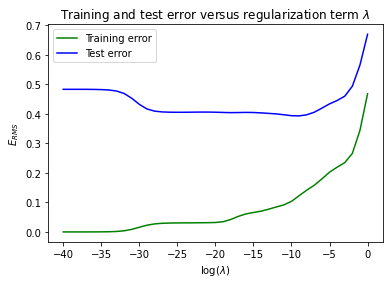

In [90]:
def polynomial_curve_fit(D, M, lmb = 0):
    ''' This functions computes the value of a polynomial with weights w on data points x.
    
    Parameters
    ----------
    D : array
        Input dataset D.
    M : int
        The degree of the polynomial.
    lmb : float, optional
        Regularization parameter for polynomial curve fitting.
    
    Returns
    -------
    float
        Fitted weight vector w that minimizes the sum-of-squares function.
    '''
    ### BEGIN SOLUTION
    # Generate A matrix
    A = np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i, j] = sum(D[:, 0]**(i+j)) + lmb * (i == j)
    
    # Generate T vector
    T = np.zeros(M+1)
    for i in range(M+1):
        T[i] = sum(D[:, 1] * (D[:, 0]**i))
        
    # Solve T = A * w for w
    w = np.linalg.solve(A, T)
    
    return w


# calculate and display weights without regularization
print("Weights for M = 5 without regularization: " +
      str(polynomial_curve_fit(D_train, 5)))
# calculate and display weights with regularization
print("Weights for M = 5 with regularization lmb = 1: " +
      str(polynomial_curve_fit(D_train, 5, 1)))

# Here we perform a new series of fits with varying lambda and fixed M = 9
fits = []
log_lambda_range = range(-40, 1)
for log_lambda in log_lambda_range:
    
    # Calculate penalized ML value for model parameters w
    w = polynomial_curve_fit(D_train, 9, math.exp(log_lambda))
    
    # Calculate predictions of outputs for training data given w
    y_train = polynomial(X_train, w)
    # Calculate predictions of ouptuts for test data given w
    y_test = polynomial(X_test, w)
    
    # Calculate root-mean-square training error
    rmse_train = math.sqrt(sum((y_train - t_train)**2) / N_train)
    # Calculate root-meqn-square test error
    rmse_test = math.sqrt(sum((y_test - t_test)**2) / N_test)
    
    fits.append(FitEvaluation(w, y_train, y_test, rmse_train, rmse_test))

# Plot training and test error versus regularization term lambda
plt.figure()
plt.plot(log_lambda_range, [f.rmse_train for f in fits], 'g-',
     log_lambda_range, [f.rmse_test for f in fits], 'b-')
plt.title("Training and test error versus regularization term $\lambda$")
plt.xlabel("$\log(\lambda)$")
plt.ylabel("$E_{RMS}$")
plt.legend(['Training error', 'Test error'])
### END SOLUTION

In [89]:
"""
Hidden test for polynomial_curve_fit.
"""
### BEGIN HIDDEN TESTS
hidden_D = np.array([[0.,1.00591921],[0.11111111,1.96616531],[0.22222222,1.60720685],[0.33333333,1.34859206],
              [0.44444444,0.64074808],[0.55555556,-0.06978151],[0.66666667,-0.00770458],
              [0.77777778,0.15185728],[0.88888889,0.74888265],[1.,1.10755075]])
hidden_w = polynomial_curve_fit(hidden_D, 3, 1)
assert np.allclose(hidden_w, np.array([0.9256032, -0.26475968, -0.14907572, 0.05980501]))
### END HIDDEN TESTS

Final solution for weights $\mathbf{w}$ takes the form of:
\begin{equation}
\mathbf{w} = (\mathbf{A} + \lambda \mathbf{I})^{-1} \mathbf{T}
\end{equation}
with matrix $\mathbf{A}$ and vector $\mathbf{T}$ defined as in the Tutorial (Week 1, Exercise 5). The weight decay drives higher order terms to zero ($\lambda=0$ and $\lambda=1$ is compared). Very little regularization (small $\lambda$) gives the overfitting we had before, adding a bit of regularization greatly improves the error on the test set (even though the error on the training set always increases), but at some point the "damping" effect becomes too strong, and the predictive results will start to deteriorate. Compare Bishop, p.11.  

### Exercise 1.6
The polynomial curve fitting procedure can be extended to the case of multidimensional inputs. Assuming an input vector  of dimension $D$, namely $\mathbf{x} = (x_1, x_2, \dots, x_D)$, we can write the regression function $y$ as:
\begin{equation}
y(\mathbf{x}; \mathbf{w}) = \sum_{j = 0}^M \left( \sum_{n_1 + n_2 + ... + n_D = j} w_{n_1 n_2 ... n_D} x_1^{n_1} x_2^{n_2} ... x_D^{n_D} \right) \label{eqn:polynomial_multidimensional} \tag{5}
\end{equation}

In the last expression, $j$ refers to the order of the polynomial terms. The inner sum is over all the combinations of non-negative integers $n_1, n_2, \dots, n_D$, such that the constraint $n_1 + n_2 + \dots + n_D = j$ holds. The terms $n_1, n_2, \dots, n_D$ correspond to the exponent for each variable $x_1, x_2, \dots, x_D$ in their respective polynomial term.

Note that if $D = 1$, the above expression simplifies to the formula in equation \eqref{yxw}. The reason the second sum disappears is that there is only one combination of the non-negative integer $n_1$ for which the constraint $n_1 = j$ holds, which means that there is only  a single term to sum over.

Fitting the polynomial curve to a multidimensional input vector works analogously to the one-dimensional case. However, the number of parameters (the size of $\mathbf{w}$) becomes much larger, even when $D = 2$. Write down the general polynomial curve equation in \eqref{eqn:polynomial_multidimensional} for $D = 2$. How many parameters are needed in the two-dimensional case? Compare this to the number of parameters in the one-dimensional case.

We can write down the polynomial regression formula \eqref{eqn:polynomial_multidimensional} for $D = 2$ as
\begin{equation*}
y(\mathbf{x}; \mathbf{w}) = \sum_{j = 0}^M \left( \sum_{n_1 + n_2 = j} w_{n_1 n_2} x_1^{n_1} x_2^{n_2} \right),
\end{equation*} 
or equivalently,
\begin{equation*}
y(\mathbf{x}; \mathbf{w}) = \sum_{j = 0}^M \left( \sum_{n = 0}^j w_{n, j - n} x_1^{n} x_2^{j-n} \right).
\end{equation*}

Using the last expression, we can immediately see that for $j$-th order individual polynomial terms, we sum over $j + 1$ different values of $n$, namely $\{0, 1, 2, \dots, j\}$. This means that for $j$-th order terms, we have $j+1$ different weights, namely $w_{0, j}, w_{1, j - 1}, \dots, w_{j, 0}$. Since we include polynomial terms up to the $M$-th degree, the total number of parameters becomes:
$$ \sum_{j = 0}^M (j + 1) \overset{k := j + 1}{=} \sum_{k=1}^{M + 1} k = \frac{(M + 1)(M + 2)}{2}. $$
In the one-dimensional case, we needed $M + 1$ parameters (see Equation \ref{yxw}), which is a number linear in $M$. We have now shown that the number of parameters is quadratic in $M$ in the two-dimensional case. In general, as the dimension $D$ grows, the number of parameters grows exponentially, proportional to $M^D$.

## Exercise 2 (weight 25)
In this exercise, we consider the gradient descent algorithm for function minimization. When the function to be minimized is $E(\mathbf{x})$, the gradient descent iteration is  
\begin{equation*}
\mathbf{x}_{n+1} = \mathbf{x}_n - \eta \nabla E(\mathbf{x}_n) \tag{6}
\end{equation*}
where $\eta>0$ is the so-called learning-rate. In the following, we will apply gradient descent to the function
\begin{equation*}
h(x,y) = 100(y - x^2)^2 +(1 - x)^2 \label{banana} \tag{7}
\end{equation*}
### Exercise 2.1
Make a plot of the function $h$ over the interval $[-2 \leq x \leq 2] \times [-1 \leq y \leq 3]$. (Tip: Use the `plot_surface` function.) Can you guess from the plot if numerical minimization with gradient descent will be fast or slow for this function?

This is Rosenbrock's so called "banana function". At every point in the graph the gradient is largely oriented towards the nearest point of the "curved valley". The gradient along the curved bottom part towards the minimum is very small compared with the gradient across it. Steep in one direction: the learning rate cannot be too big otherwise it will diverge; flat in the other: learning will slow down. This means gradient descent is in trouble.

In [14]:
"""
Create function h.
"""
def h(x,y):
    ### BEGIN SOLUTION
    return 100*(y-x**2)**2+(1-x)**2
    ### END SOLUTION

"""
Declare x and y.
"""    
### BEGIN SOLUTION
x = np.arange(-2, 2, 0.5)
y = np.arange(-1, 3, 0.5)
### END SOLUTION

In [15]:
"""
Hiddent test for function h.
"""
### BEGIN HIDDEN TESTS
assert np.array_equal(h(x,y),np.array([2509.,762.5,104.,8.5,101.,156.5,100.,6.5]))
### END HIDDEN TESTS

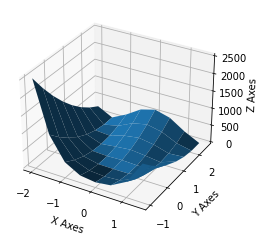

In [16]:
"""
Create a function to plot h.
"""
def plot_h(x,y):
    ### BEGIN SOLUTION
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    x, y = np.meshgrid(x, y)
    z = h(x,y)

    ax.plot_surface(x,y,z)
    ax.set_xlabel('X Axes')
    ax.set_ylabel('Y Axes')
    ax.set_zlabel('Z Axes')

    plt.show()
    ### END SOLUTION

plot_h(x,y)

### Exercise 2.2
Knowing that a critical point of a function is a point where the gradient vanishes, show that $(1, 1)$ is the unique critical point of $h$.  Prove that this point is a minimum for $h$. 

The gradient $\nabla h$ is given by
\begin{eqnarray*}
\frac{\partial h}{\partial x} & = & 400 x^3 -400yx+2x-2 \\
\frac{\partial h}{\partial y} & = & 200y - 200x^2
\end{eqnarray*}
Setting equal to zero gives
\begin{eqnarray*}
400 x^3 -400yx+2x-2& = &0\\
  200y - 200x^2 & =& 0
\end{eqnarray*}
The second gives $y = x^2$, substituting this in the first results in
$$400 x^3 -400 x^2 x + 2x -2 = 2x - 2 = 0 $$ which implies $x = 1$ and so also $y = 1$.

We have shown that $(1, 1)$ is a critical point, but we still have to show that this point is a minimum. A function attains a local minimum at a critical point if its Hessian (the square matrix of second-order partial derivatives) is positive definite at that point. In the univariate case, this is equivalent to the second derivative being (strictly) positive at that point. 

The Hessian matrix of $h$ is computed in Equation \ref{eq:hess}. We have to show that the Hessian matrix of $h$ is positive definite at point $(1, 1)$.

\begin{equation}
	\label{eq:hess}
	\mathbf{H}_h(x, y) = \begin{bmatrix}
		\frac{\partial^2 h}{\partial x^2} & \frac{\partial^2 h }{\partial x \partial y}\\
		\frac{\partial^2 h}{\partial y \partial x} & \frac{\partial^2 h }{\partial y^2} \\
	\end{bmatrix} = \begin{bmatrix}
		1200 x^2 - 400 y + 2 & -400 x \\
		- 400 x & 200 \\
	\end{bmatrix}
    \tag{8}
\end{equation}

One way to do this is to show that all the eigenvalues of $\mathbf{H}_h(1, 1)$ are (strictly) positive. Alternatively, we can show that all the leading principal minors -- The $k^{th}$ leading principal minor of a matrix is the determinant of its upper-left $k$ by $k$ sub-matrix. -- of $\mathbf{H}_h(1, 1)$ are (strictly) positive. For this two-dimensional function, it is easier to use the second method.

$$
	\mathbf{H}_h(1, 1) = \begin{bmatrix}
	802 & -400 \\
	- 400 & 200 \\
	\end{bmatrix} 
$$

Since $\begin{vmatrix} 802 \end{vmatrix} = 802 > 0$ and $\begin{vmatrix} 802 & -400 \\ -400 & 200 \\ \end{vmatrix} = 160400 - 160000 = 400 > 0$, it means that all the leading principal minors of $\mathbf{H}_h(1, 1)$ are (strictly) positive, hence the matrix is positive definite and the critical point $(1, 1)$ is a local minimum. In the case of this particular function, the local minimum also happens to be the global minimum. (Can you explain why?)

### Exercise 2.3
Write down the gradient descent iteration rule for this function. 

The gradient descent iteration rule is:
\begin{eqnarray*}
x_{n+1}& = &x_n - \eta ( 400 x_n^3 -400y_n x_n+2x_n-2 )\\
y_{n+1} & = &y_n - \eta( 200 y_n - 200x_n^2 )
\end{eqnarray*}

### Exercise 2.4
Implement gradient descent. Try some different values of $\eta$. Does the algorithm converge? How fast? Make plots of the trajectories on top of a contour plot of $h$. (Hint: have a look at the example contour_example.py on Brightspace for inspiration to plot contours of functions and trajectories). Report your findings. Explain why numerical minimization with gradient descent is slow for this function.

First implement the derivative of $h(x,y)$.

In [17]:
def dh_dxy(x, y):
    """
    This function is the derivative of the function h(x, y).
    
    Parameters
    ----------
    x : float
        data point from x-axis
    y : float
        data point from y-axis
    
    Returns
    -------
    vals : array
        NumPy array of parameter values computed during minimization
    """
    ### BEGIN SOLUTION
    return np.array([400 * x**3 - 400 * y * x + 2 * x - 2, 200 * y - 200 * x**2])
    ### END SOLUTION

In [18]:
"""
Test for dh_dxy.
"""
assert np.array_equal(dh_dxy(1, 1), np.array([0, 0]))

Now implement the gradient descent algorithm.

In [19]:
def grad_descent(grad, val_init, eta, max_iter, tol):
    """ This function implements the gradient descent algorithm.
    
    Parameters
    ----------
    grad : function
        Returns the derivative of the function with respect to the pair (x, y).
    val_init : tuple
        Initial values for parameters
    eta : float
        Gradient descent learning rate
    max_iter : int
        Maximum number of gradient descent iterations
    tol : float
        Tolerance for detecting convergence
    
    Returns
    -------
    vals : array
        NumPy array of parameter values computed during minimization
    dists : array
        NumPy array of distances from the current point to the previous point
    tot_iter : int
        Number of performed gradient descent iterations
    """
    ### BEGIN SOLUTION
    # Initialization
    val = val_init
    # Keep track of everything
    vals = np.array([val])
    vals.shape = (1, len(val)) # make vals two-dimensional
    dists = np.array([math.inf])
    
    # Gradient descent iterations
    for i in range(max_iter):
        # Calculate next coordinates
        val_new = val - eta * grad(*val.flatten())
        # Calculate distance to current coordinates
        dist = np.linalg.norm(val_new - val, ord = 2)
        # Update coordinates (parameter values)
        val = val_new
        # Keep track of everything
        vals = np.append(vals, val.reshape(1, len(val)), axis = 0)
        dists = np.append(dists, dist)
        
        # if converged, exit the loop
        if dist < tol:
            break
        
    tot_iter = i+1
    
    return vals, dists, tot_iter
    ### END SOLUTION

In [20]:
"""
Hidden test for grad_descent.
"""
### BEGIN HIDDEN TESTS
vals, dists, tot_iter = grad_descent(dh_dxy, np.array([1, -1]), 1e-4, 5, 1e-6)
assert np.array_equal(np.round(vals,2), [[1.,-1.],[0.92,-0.96],[0.85,-0.92],[ 0.8,-0.89],[0.75,-0.86],[0.71,-0.83]])
assert np.array_equal(np.round(dists,2),[float('inf'),0.09,0.08,0.07,0.06,0.05])
assert tot_iter == 5
### END HIDDEN TESTS

Finally, run the gradient descent algorithm with different values of $\eta$.

eta = 0.0001 needs 10000 iterations to obtain a tolerance of 3.670770720908214e-05
eta = 0.001 needs 10000 iterations to obtain a tolerance of 4.9858621233714535e-06


<ipython-input-17-e68342d2e322>:18: RuntimeWarning: overflow encountered in double_scalars
  return np.array([400 * x**3 - 400 * y * x + 2 * x - 2, 200 * y - 200 * x**2])
<ipython-input-17-e68342d2e322>:18: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([400 * x**3 - 400 * y * x + 2 * x - 2, 200 * y - 200 * x**2])


eta = 0.003 needs 10000 iterations to obtain a tolerance of nan


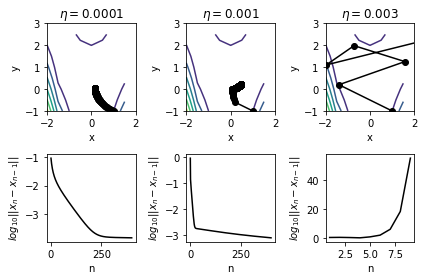

In [21]:
### BEGIN SOLUTION
# Plot trajectories for different values of eta
etas = [1e-4, 1e-3, 3e-3]
x, y = np.meshgrid(x, y)

for i in range(len(etas)):
    
    # run gradient descent
    vals, dists, tot_iter = grad_descent(dh_dxy, np.array([1, -1]), etas[i], 10000, 1e-9)
    print(f'eta = {etas[i]} needs {tot_iter} iterations to obtain a tolerance of {dists[tot_iter]}')

    # plot distance versus iterations
    last_iter = 401
    plt.subplot(2, len(etas), len(etas) + i + 1)
    plt.plot(range(0, last_iter), np.log10(dists[0:last_iter]), 'k-')
    plt.xlabel('n')
    plt.ylabel('$log_{10} ||x_n - x_{n-1}||$')
    plt.tight_layout()
    
    # plot trajectory
    plt.subplot(2, len(etas), i + 1)
    plt.contour(x, y, h(x, y))
    plt.plot(vals[0:last_iter, 0], vals[0:last_iter, 1], 'k-o')
    plt.xlim([-2, 2])
    plt.ylim([-1, 3])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.title(f'$\eta = {etas[i]}$')

### END SOLUTION

Explain what you see!

For this starting point $(1,-1)$, the gradient descent algorithm seems to converge for $\eta = 0.0001$ and $\eta = 0.001$, but diverges for $\eta = 0.003$.
The convergence is very slow: even after 10000 steps, the step size is still considerable.

At every point in the graph the gradient is largely oriented towards the nearest point of the "curved valley". The gradient along the curved bottom part towards the minimum is very small compared with the gradient across it. As a result for a small deviation from the bottom, the next gradient step is primarily back towards the bottom, i.e. perpendicular to the direction along the bottom of the valley you try to follow towards the minimum. More advanced methods, e.g. conjugate gradient descent, can take this into account and have no problem in finding the minimum in a few steps.

## Exercise 3 (weight 25)
Suppose we have two healthy but curiously mixed boxes of fruit, with one box containing 8 apples and 4 grapefruit and the other containing 15 apples and 3 grapefruit. One of the boxes is selected at random and a piece of fruit is picked (but not eaten) from the chosen box, with equal probability for each item in the box. The piece of fruit is returned and then once again from the *same* box a second piece is chosen at random. This is known as sampling with replacement. Model the box by random variable $B$, the first piece of fruit by variable $F_1$, and the second piece by $F_2$.
### Exercise 3.1
What is the probability that the first piece of fruit is an apple given that the second piece of fruit was a grapefruit? How can the result of the second pick affect the probability of the first pick?

Requested is $p(F_1 = a|F_2=g)$, which follows from:
\begin{equation*}
    \begin{aligned}
    p(F_1=a|F_2=g) = & p(F_1 = a, B = 1 | F_2 = g) + p(F_1 = a, B = 2 | F_2 = g) \\ 
     = & p(F_1=a|B=1) p(B=1|F_2=g) + \\ 
    &  p(F_1=a|B=2) p(B=2|F_2=g)
    \end{aligned}
    \label{eqn:with_replacement} \tag{10}
\end{equation*}
To arrive at the result of \eqref{eqn:with_replacement}, we used the fact that $p(F_1 | B, F_2 ) = p(F_1 | B)$. Once we know the box from which the fruit were picked, the two picks become independent.

Since the first piece of fruit is put back, the probabilities on the second pick are identical to the ones on the first pick, i.e. $p(F_2) = p(F_1)$, and therefore (Bayes' rule):
\begin{eqnarray*}
p(B=1|F_2=g) & = & \frac{p(F_2=g|B=1) p(B=1)}{p(F_2=g)}\\
 & = & \frac{p(F_2=g|B=1) p(B=1)}{1 - p(F_1=a)} \\
 & = & \frac{\frac{4}{12} \frac{1}{2}}{(1 - \frac{3}{4})} \\
 & = & \frac{2}{3}
\end{eqnarray*}

Substituting in \eqref{eqn:with_replacement}, using $p(B=2|F_2=g) = 1 - p(B=1|F_2=g)$, then gives
\begin{eqnarray*}
p(F_1=a|F_2=g) &=& \frac{8}{12} \frac{2}{3} + \frac{15}{18} (1 - \frac{2}{3}) \\
 & = & \frac{8}{18} + \frac{5}{18} \\
 & = & \frac{13}{18}
\end{eqnarray*}

Note that the probability of picking an apple the first time changes when information about a later event is known. In other words: a probability is not a fixed "objective" property of a real world event, but quantifies a state of knowledge about that event.

Please add the final result you got in the cell below! (Add it as a fraction, not an estimate. For example, write __1/3__, do not round to a number of decimals.)

In [22]:
"""
The variable p is probability of the first piece of fruit being
an apple given that the second piece of fruit was a grapefruit.
"""
### BEGIN SOLUTION
p = 13/18
### END SOLUTION

In [23]:
"""
Hidden check for value of variable p.
"""
### BEGIN HIDDEN TESTS
assert abs(p-13/18) < 1e-10
### END HIDDEN TESTS

### Exercise 3.2
Imagine now that after we remove a piece of fruit, it is not returned to the box. This is known as sampling without replacement. In this situation, recompute the probability that the first piece of fruit is an apple given that the second piece of fruit was a grapefruit. Explain the difference.

Requested is $p(F_1 = a|F_2=g)$, which follows from:
\begin{equation}
	\begin{aligned} \label{eqn:without_replacement}
	p(F_1=a|F_2=g) = & p(F_1 = a, B = 1 | F_2 = g) + p(F_1 = a, B = 2 | F_2 = g) \\ 
	= & p(F_1=a|B=1, F_2 = g) p(B=1|F_2=g) + \\ 
	&  p(F_1=a|B=2, F_2 = g) p(B=2|F_2=g) \\
	\end{aligned}
    \tag{11}
\end{equation}
	
Note that it is no longer true that $p(F_1 | B, F_2 ) = p(F_1 | B)$, which we used previously in equation \eqref{eqn:with_replacement}. Even if we know the box from which we are picking fruit, the fact that the picked fruit is not replaced makes the two picks dependent. Using Bayes' rule, we have:
\begin{align*}
    p(F_1 = a | B = 1, F_2 = g) &= \frac{p(F_2 = g | B = 1, F_1 = a) p(F_1 = a | B = 1)}{p(F_2 = g | B = 1)} \\
	&= \frac{\frac{4}{11} \frac{8}{12}}{\frac{4}{11} \frac{8}{12} + \frac{3}{11} \frac{4}{12}} \\
	&= \frac{8}{11}			
\end{align*}
	
\begin{align*}
    p(F_1 = a | B = 2, F_2 = g) &= \frac{p(F_2 = g | B = 2, F_1 = a) p(F_1 = a | B = 2)}{p(F_2 = g | B = 2)} \\
	&= \frac{\frac{3}{17} \frac{15}{18}}{\frac{3}{17} \frac{15}{18} + \frac{2}{17} \frac{3}{18}} \\
	&= \frac{15}{17}			
\end{align*}
	
Even though the first piece of fruit is not returned to the box, the _marginal_ probabilities of the second pick do not change, i.e. $p(F_2 | B) = p(F_1 | B)$. One way to see this is to imagine labeling the pieces of fruit in a random order. It is equally probable that an apple in a given box is labeled as 1 (first pick) or 2 (second pick). However, this only holds in the absence of additional information, such as which fruit were picked at different times. Confirm this for yourself.
	
Given that the marginals are the same, the derivation of $p(B = 1 | F_2 = g)$ is the same as in the previous part:
\begin{eqnarray*}
    p(B=1|F_2=g) & = & \frac{p(F_2=g|B=1) p(B=1)}{p(F_2=g)}\\
	& = & \frac{p(F_2=g|B=1) p(B=1)}{1 - p(F_1=a)} \\
	& = & \frac{\frac{4}{12} \frac{1}{2}}{(1 - \frac{3}{4})} \\
	& = & \frac{2}{3}
\end{eqnarray*}
	
Substituting in \eqref{eqn:without_replacement} and using $p(B=2|F_2=g) = 1 - p(B=1|F_2=g)$ gives:
	\begin{eqnarray*}
		p(F_1=a|F_2=g) &=& \frac{8}{11} \frac{2}{3} + \frac{15}{17} \frac{1}{3} \\
		& = & \frac{437}{561}
	\end{eqnarray*}
	
Note that the probability $p(F_1=a|F_2=g)$ is higher than when we were sampling with replacement. Intuitively, the fact that we picked a grapefruit the second time reduces the probability that we picked a grapefruit the first time, as this would have taken one grapefruit out of the box. This in turn increases the probability of the first pick being an apple.

Please add the final result you got in the cell below! (Add it as a fraction, not an estimate. For example, write __1/3__, do not round to a number of decimals.)

In [24]:
"""
The variable p is probability of the first piece of fruit being
an apple given that the second piece of fruit was a grapefruit
when the sampling was done without replacement.
"""
### BEGIN SOLUTION
p = 437/561
### END SOLUTION

In [25]:
"""
Hidden check for value of variable p.
"""
### BEGIN HIDDEN TESTS
assert abs(p-437/561) < 1e-10
### END HIDDEN TESTS

### Exercise 3.3
Starting from the initial situation (i.e., sampling with replacement), we add a dozen oranges to the first box and repeat the experiment. Show that now the outcome of the first pick has no impact on the probability that the second pick is a grapefruit. Are the two picks now dependent or independent? Explain your answer.

We have to show that the probability of the second pick being a grapefruit given the outcome of the first pick has the same value as the probability of the second pick:
\begin{eqnarray*}
p(F_2=g) &=& p(F_2=g|B=1) p(B=1) + p(F_2=g|B=2) p(B=2)\\
 &=& \frac{4}{24}\cdot \frac{1}{2} + \frac{3}{18}\cdot \frac{1}{2} =\frac{1}{6}= 0.1666\\
p(B=1|F_1=g) &=& \frac{p(F_1=g|B=1) p(B=1)} { p(F_1=g)}\\
&=& \frac{\frac{4}{24} \frac{1}{2}}{\frac{1}{6}} = \frac{1}{2} = 0.5\\
p(F_2=g|F_1=g) &=& p(F_2=g|B=1) p(B=1|F_1=g) + p(F_2=g|B=2) p(B=2|F_1=g) \\
&=& \frac{4}{24}\cdot \frac{1}{2} + \frac{3}{18}\cdot \frac{1}{2} = \frac{1}{6}= 0.1666
\end{eqnarray*}

Similarly, we can show that $p(F_2 = g | F_1 = a) = p(F_2 = g | F_1 = o) = p(F_2 = g)$.

No: despite the equality $p(F_2=g|F_1)=p(F_2)$, $F_1$ and $F_2$ are _not_ independent. Independence only holds if $p(F_2=y|F_1=x)=p(F_2=y)$ for _all possible values_ $x,y$. In other words, independence applies to random variables as a whole, not to specific outcomes only. $F_1$ and $F_2$ are not independent as is easily seen by considering, for example, $p(F_2=a|F_1=o)$: once the first pick was an orange you _know_ it had to come from box 1 as the other box contained no oranges whatsoever. The probability of picking an apple from box 1 is $\frac{1}{3}$, while the probability of picking an apple from either box is $\frac{8}{24} \cdot \frac{1}{2} + \frac{15}{18} \cdot \frac{1}{2}=\frac{1}{2}$.

## Exercise 4 - Bonus (weight 10)
Given a joint probability density function over the random vector $\mathbf{X} = (X_1, X_2, X_3, X_4)$ that factorizes as
$$p(x_1, x_2, x_3, x_4) = p(x_1, x_4 | x_2) p(x_2, x_3 | x_1),$$
show (using the sum and product rules for marginals and conditionals) that the following independence statements hold, in which the symbol $\bot$ stands for (conditional) independence:
1. $ X_1 \bot X_2;$
2. $ X_3 \bot X_4 \,|\, X_1, X_2.$

1. We will show that $p(x_2 | x_1) = p(x_2)$. 
$$
\begin{align*}
    p(x_1, x_2) &= \sum_{x_3} \sum_{x_4} p(x_1, x_2, x_3, x_4) \\
	&= \sum_{x_3} \sum_{x_4} p(x_1, x_4 | x_2) p(x_2, x_3 | x_1) \\
	&= \left(\sum_{x_4} p(x_1, x_4 | x_2) \right) \left(\sum_{x_3} p(x_2, x_3 | x_1) \right) \\
	&= p(x_1 | x_2) p(x_2 | x_1) 
\end{align*}
$$
We now use the fact that $p(x_1, x_2)$ factorizes as $p(x_1 | x_2) p(x_2)$ (or equivalently $p(x_2 | x_1) p(x_1)$). Using the previous result, we get:
$$ p(x_1 | x_2) p(x_2) = p(x_1 | x_2) p(x_2 | x_1) \implies p(x_2) = p(x_2 | x_1). \quad \square $$
2. We will show that $p(x_3, x_4 | x_1, x_2) = p(x_4 | x_1, x_2) p(x_3 | x_1, x_2)$.
$$
\begin{align*}
    p(x_3, x_4 | x_1, x_2) &= \frac{p(x_3, x_4, x_1, x_2)}{p(x_1, x_2)} \\
    &= \frac{p(x_1, x_4 | x_2) p(x_2, x_3 | x_1)}{p(x_1 | x_2) p(x_2 | x_1)} \\
	&= \frac{p(x_1, x_4 | x_2)}{p(x_1 | x_2)} \cdot \frac{p(x_2, x_3 | x_1)}{p(x_2 | x_1)} \\
	&= p(x_4 | x_1, x_2) p(x_3 | x_1, x_2). \quad \square
\end{align*}
$$